# Домашнє завдання до модуля 4: візуалізація даних.
В цьому ДЗ ми будемо багато працювати не тільки з візуалізаціями, а і з функціоналом pandas, адже візуалізація даних - це частина аналізу даних та працює спільно з агрегацією та фільтрацією наших даних. До того ж перед тим, як аналізувати дані, їх треба почистити. Чим ми і займемось.  

0.Імпортуйте бібліотеки matplotlib.pyplot, seaborn та pandas.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Набір даних Taxis

Використовуючи метод з бібліотеки `seaborn` `load_dataset` ми завантажимо перший набір даних для аналізу. Завантажимо дані так, бо це зручно + аби ви знали, що є і така можливість знайти собі набір даних для експериментів.  
Набір даних містить поїздки таксі у Нью Йорку у 2019 році. Детальний опис на [сайті](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page).  

Які колонки мість набір даних:  
- `pickup` - час початку поїздки  
- `dropoff` - час закінчення поїздки  
- `passengers` - кількість пасажирів у поїздці  
- `distance` - відстань поіздки  
- `fare` - базова плата за поїздку  
- `tip` - розмір чайових  
- `tolls` - плата за платні дороги (за це також платить пасажир)  
- `total` - сумарна плата за поїздку  
- `color` - колір авто, яке здійснювало поїздку  
- `payment` - метод оплати  
- `pickup_zone` - зона, у якій почалась поїздка  
- `dropoff_zone` - зона, у якій закінчилась поїздка  
- `pickup_borough` - район, у якому почалась поїздка  
- `dropoff_borough` - район, у якому закінчилась поїздка  

Назви ознак здбільшого говорять самі за себе. Слово borough перекладається з англійської як "район".

Ми будемо працювати сами з тим шматочком даних, які наявні в seaborn.  
Переглянути всі набори даних з seaborn можна [тут](https://github.com/mwaskom/seaborn-data).

Спершу - завантажуємо дані - просто виконайте клітинку нижче.

In [2]:
df_taxi = sns.load_dataset('taxis')

1.Виведіть 
- перші 3 записи з набору даних
- типи даних в наборі даних df_taxi
- розміри набору даних

In [3]:
display(df_taxi.head(3))
display(df_taxi.dtypes)
display(df_taxi.shape)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan


pickup             datetime64[ns]
dropoff            datetime64[ns]
passengers                  int64
distance                  float64
fare                      float64
tip                       float64
tolls                     float64
total                     float64
color                      object
payment                    object
pickup_zone                object
dropoff_zone               object
pickup_borough             object
dropoff_borough            object
dtype: object

(6433, 14)

Очікуваний результат (можна вивести в окремих клітинках):

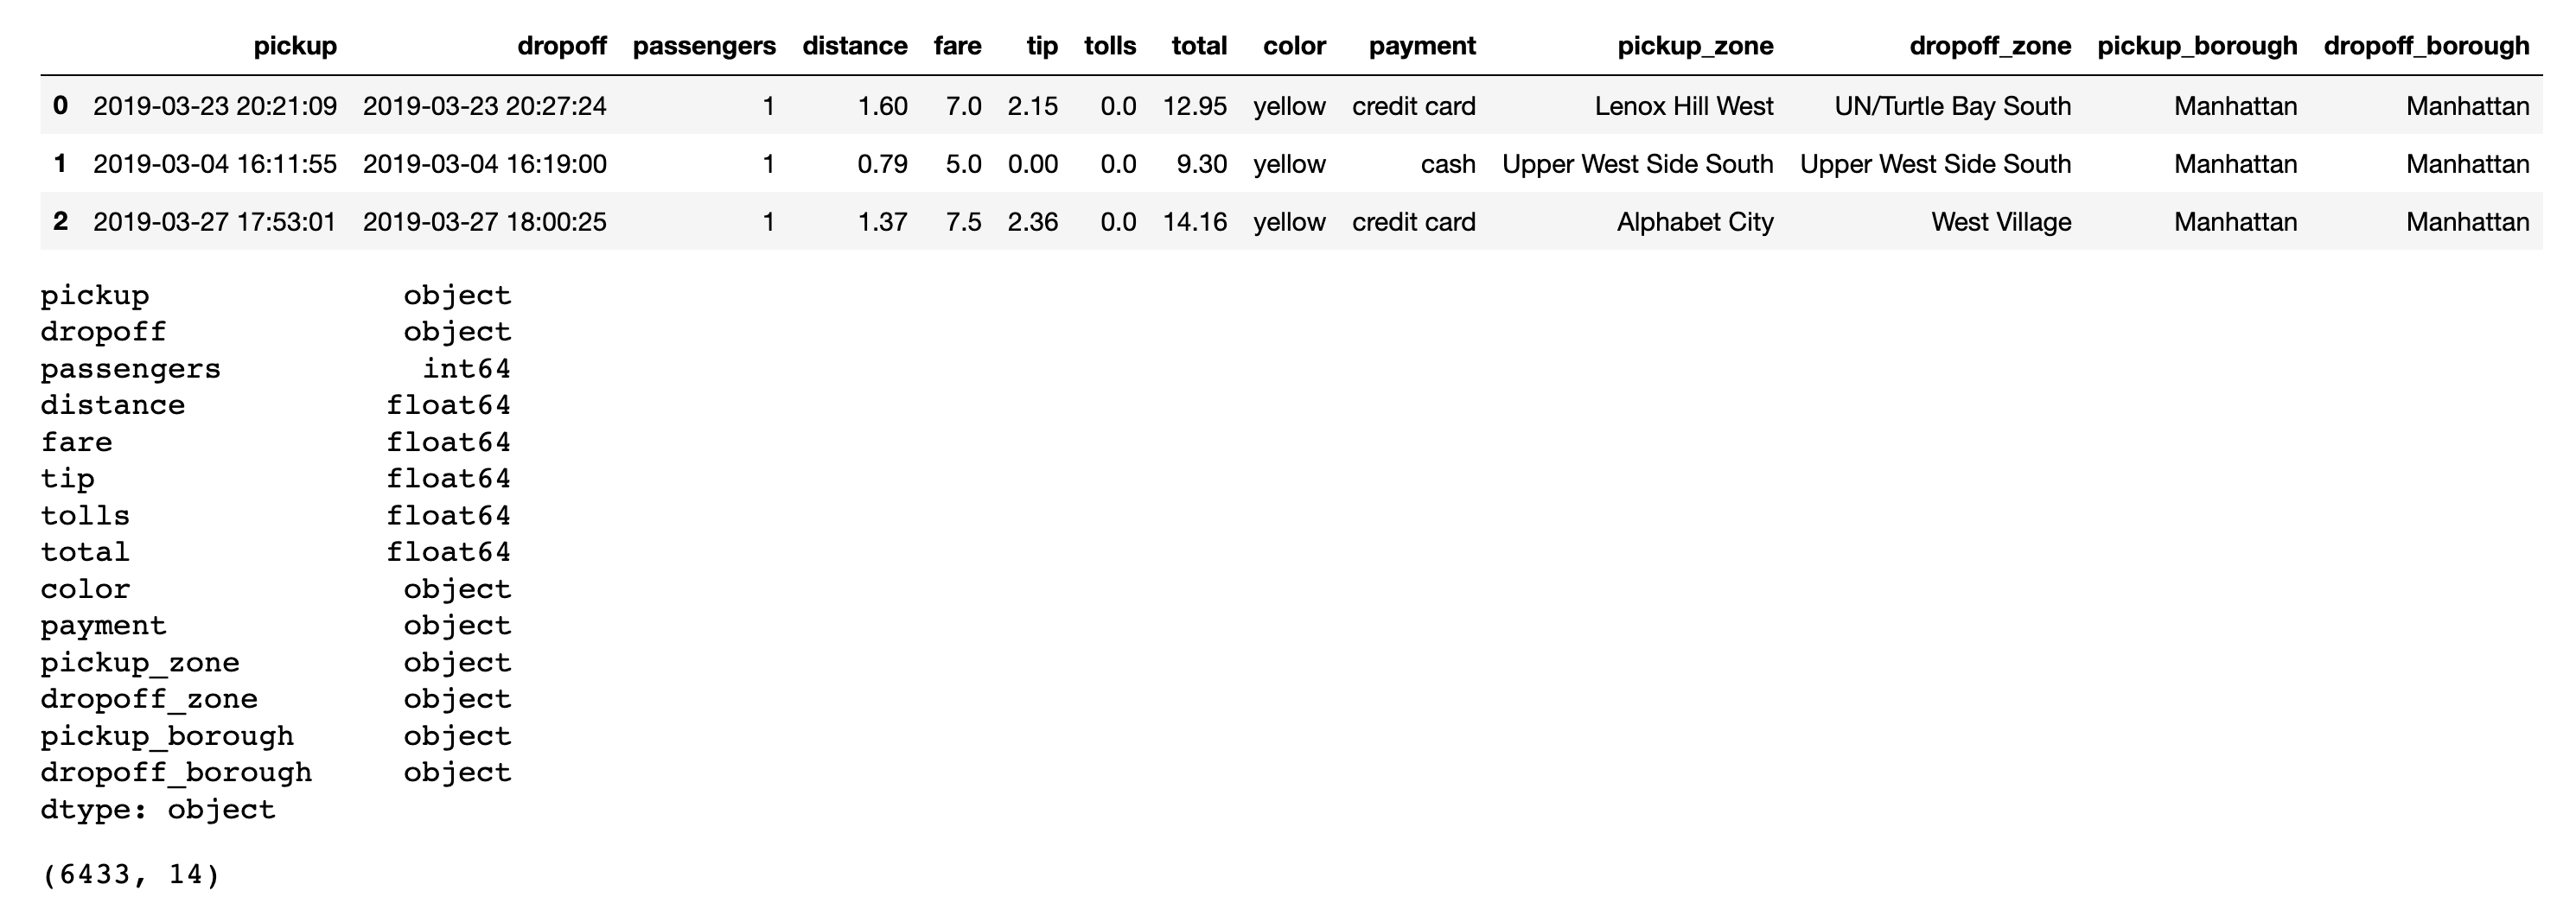

2.Перевіримо, чи є в цьому наборі даних пропущені значення. Для цього можемо вивести кількість пропущених значень в кожній колонці наступним чином (це надзвичайно корисна команда, запамʼятайте її):

In [4]:
df_taxi.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

Цікаво, чому дані відсутні? Відповідь на це питання нам дасть розуміння, чи можна такі дані видалити, чи можливо їх треба якось заповнити. Виведіть на екран ті рядки, де колонка, яка має найбільше пропущених значень (або одна з тих, що має максимальну кількість пропущених), має пропущені значення. 
Подивіться на результат і напишіть свої думки щодо питань:
- чому на ваш погляд в цих рядках є відстуні дані в кількох колонках? Чому ви так думаєте?
- чому на ваш погляд є рядки з distance==0, а total!=0? Як ви до цього прйишли?
Відповідь просто текстом. Можна використовувати будь-які допоміжні операції над датасетом чи джерела, які допоможуть вам відповісти на ці питання. Якщо щось використовуєте, то це треба зазначити у відповіді.  

Ваша відповідь тут - це 70% виконання цього завдання.

In [5]:
df_taxi.isna().sum().idxmax()

'dropoff_zone'

In [6]:
df_dropoff_na = df_taxi[df_taxi['dropoff_zone'].isna()].copy()
df_dropoff_na.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
42,2019-03-30 23:59:14,2019-03-30 23:59:17,1,0.00,80.0,20.08,0.0,100.38,yellow,credit card,NaN,NaN,NaN,NaN
622,2019-03-12 19:52:36,2019-03-12 19:52:55,3,0.00,120.0,33.20,12.5,166.00,yellow,credit card,NaN,NaN,NaN,NaN
711,2019-03-21 17:39:50,2019-03-21 18:12:54,2,1.74,17.0,4.26,0.0,25.56,yellow,credit card,Midtown East,NaN,Manhattan,NaN
739,2019-03-14 00:09:17,2019-03-14 00:09:21,1,0.03,2.5,0.00,0.0,3.80,yellow,cash,Upper East Side South,NaN,Manhattan,NaN
970,2019-03-29 00:02:00,2019-03-29 00:02:05,2,0.00,45.0,5.00,0.0,50.30,yellow,credit card,NaN,NaN,NaN,NaN


In [7]:
df_taxi['distance'].value_counts().reset_index().sort_values(by='distance')

,distance,count
17,0.00,51
692,0.01,1
441,0.02,3
952,0.03,1
674,0.04,1
...,...,...
1038,30.23,1
747,33.46,1
679,33.76,1
689,36.66,1


##  На мою думку, пусті значення можуть бути з деяких причин:
   - місце посадки та висадки може бути не заповнене через те, що не працювала система GPS, тому дані не змогли занестися в базу
   - данні про місце посадки/висадки вносятся не автоматично, а безпосередньо водієм. Деяка кількість не досить сумлінних водіїв забувають або не вважають необхідним вносити ці дані. 
А оскільки дані про оплату потрапляють з іншого джерела інформації в базу даних, ми бачимо таку ситуацію, коли дистанція 0, а оплата за поїздку є. Саме тому, що джерела інформації не пов'язані. Ще можливий варіант, при якому частина замовлень відбувається через застосунок, а частина шляхом "голосування на дорозі" 
   - пасажир відмінив замовлення але є якась мінімальна сума (або саме дистанція), яка має бути оплачена в будь якому разі, при скасуванні замовлення пасажиром

Під час аналізу попереднього питання, виявлено, що фінальна сума за поїздку не збігається з базовою сумою при відсутності сплати чайових та оплати за платні дороги. Перевіримо чи є такі дані валідними і розрахуємо перевірочну фінальну суму. Порівняємо її з 'total'

In [8]:
t = df_taxi[['fare', 'tip', 'tolls', 'total']].copy()
t['check_total'] = t[['fare', 'tip', 'tolls']].sum(axis=1).copy()
t.head(3)

,fare,tip,tolls,total,check_total
0,7.0,2.15,0.0,12.95,9.15
1,5.0,0.00,0.0,9.30,5.00
2,7.5,2.36,0.0,14.16,9.86


In [9]:
t.columns

Index(['fare', 'tip', 'tolls', 'total', 'check_total'], dtype='object')

In [10]:
t['diff'] = t.diff(axis= 1)['check_total'].astype(dtype=float).copy()
t = t.reset_index()
t['diff'] = t['diff'].apply('abs')

In [11]:
t['diff'].value_counts(normalize=True).sort_index().head()

diff
0.0    0.003420
0.3    0.001244
0.3    0.000155
0.3    0.000777
0.3    0.000155
Name: proportion, dtype: float64

In [12]:
t_borough = df_taxi['pickup_borough']
t_borough = t_borough.reset_index()

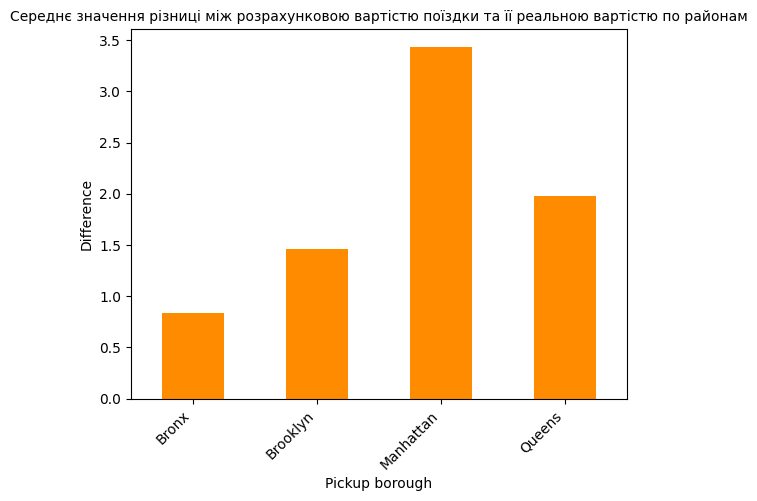

In [13]:
df_merge = t.merge(t_borough, how='inner')
df_merge.groupby('pickup_borough')['diff'].agg('mean').plot(kind='bar', color='darkorange')
plt.title('Середнє значення різниці між розрахунковою вартістю поїздки та її реальною вартістю по районам', fontsize=10)
plt.xlabel('Pickup borough')
plt.ylabel('Difference')
plt.xticks(rotation=45, ha='right');

Отже, можемо зробити висновок, що різниця між розрахунковою вартістю поїздки та її реальною вартістю це не помилка, оскільки співпадіння сум спостерігається лише у 0.3 % поїздок.
Можемо припустити, що фактична вартість може залежати не тільки від дистанції, а і від часу поїздки і району з більшою кількістю корок на дорозі мають більшу і вищу суму надбавки.

3.Заповнимо пусті значення. Оскільки всі колонки набору даних мають пропущені значення в рядках з типом даних рядок, заповнимо пропущені значення рядком `NA`.
Створіть набір даних `df_taxi_clean`, який містить дані `df_taxi` із заповненими пропущеними значеннями у всіх колонках (де ті значення відсутні) значенням `NA`.

**УВАГА!** Надалі в роботі треба використовувати `df_taxi_clean`, ми ж його і створили для того, аби далі ним користуватись :)

In [14]:
df_taxi_clean = df_taxi.fillna('NA').copy()

Після виконання завдання запустіть наступну клітинку:

In [15]:
df_taxi_clean.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

Очікуваний результат виконання коду в попердній клітинці:

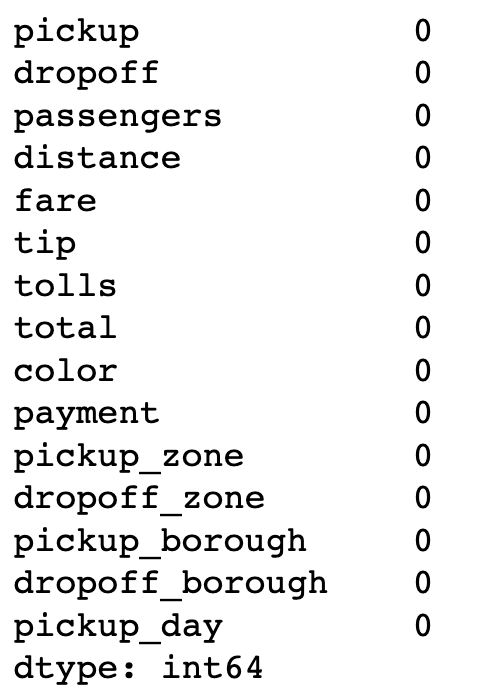

4.Хочеться подивитись на дані у динаміці. Перетворіть колонку `pickup` набору даних `df_taxi_clean` (нам нема чого працювати з "брудними" даними, якщо ми їх вже почистили, але хай будуть в окремій змінній про всяк випадок) у формат `datetime64[ns]`. 
Якщо у Вас при завантаженні набору даних колонка `pickup`- вже в форматі `datetime64[ns]` - можете пропустити це завдання, або спробувати все ж таки написат функцію для трансформації.

Результат перетворення збережіть в тій самій колонці `pickup`.

Після виконання завдання запустіть наступну клітинку:

In [16]:
df_taxi_clean.pickup.head(3)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-27 17:53:01
Name: pickup, dtype: datetime64[ns]

Очікуваний результат виконання коду в попердній клітинці:

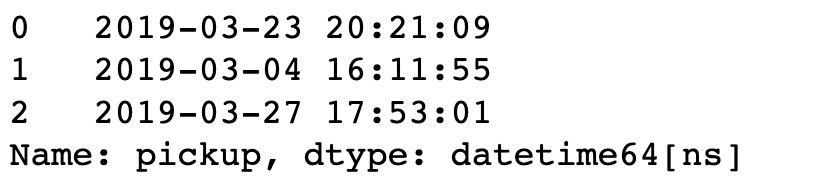

5.У нас колонка pickup зараз мість дані у форматі дата-час. Пропоную прибрати час і зробити аналітику по дням. Для цього виконайте клатинку нижче:

In [17]:
df_taxi_clean['pickup_day'] = df_taxi_clean.pickup.dt.floor('d')
df_taxi_clean['pickup_day'].describe()

count                             6433
mean     2019-03-15 18:09:00.587595264
min                2019-02-28 00:00:00
25%                2019-03-08 00:00:00
50%                2019-03-15 00:00:00
75%                2019-03-23 00:00:00
max                2019-03-31 00:00:00
Name: pickup_day, dtype: object

А тепер згрупуйте дані по pickup_day та виведіть графік сумарних платежів по дням. УВАГА! Якщо хочете отримати підписи по осі ОХ як на прикладі, то графік необхідно будувати через `df.plot(...)`. Якщо у Вас будуть інші підписи осі ОХ - це ОК.

Після виведення графіку скажіть, чи бачите щось дивне на ньому? Важливо написати відповідь в цьому завданні словами.

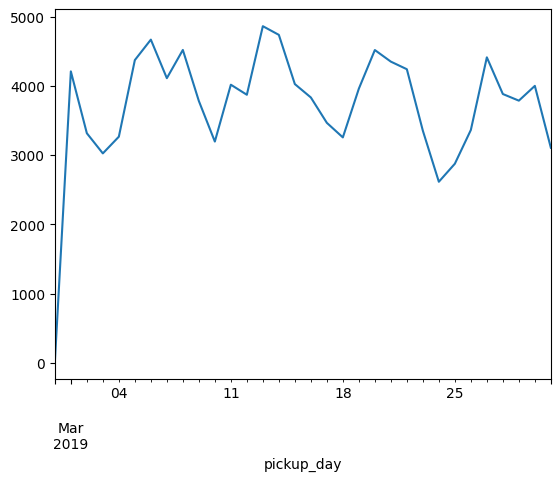

In [18]:
df_taxi_clean.groupby('pickup_day')['total'].agg('sum').plot();

In [19]:
df_taxi_clean['pickup_name_of_day'] = df_taxi_clean['pickup'].dt.day_name()

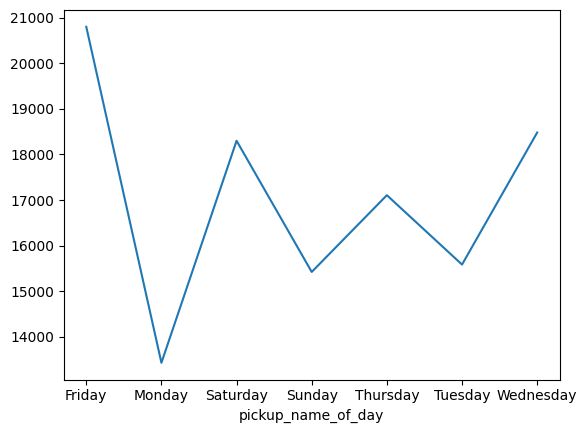

In [20]:
df_taxi_clean.groupby('pickup_name_of_day')['total'].agg('sum').plot();

In [21]:
df_taxi_clean.groupby('pickup_name_of_day')['total'].agg(['count', 'sum'])

,count,sum
pickup_name_of_day,,
Friday,1115,20804.21
Monday,708,13426.67
Saturday,1046,18301.77
Sunday,868,15421.16
Thursday,905,17106.07
Tuesday,825,15583.30
Wednesday,966,18481.79


Попередній висновок, щодо зниження попиту на перевезення у вихідні дні, виявився не точним. Як бачимо з графіку, найнижчий показник кількості і, відповідно, суми перевезень у неділю, понеділок та вівторок, що підтверджує і числовий розрахунок.

Приклад очікуваного графіку:

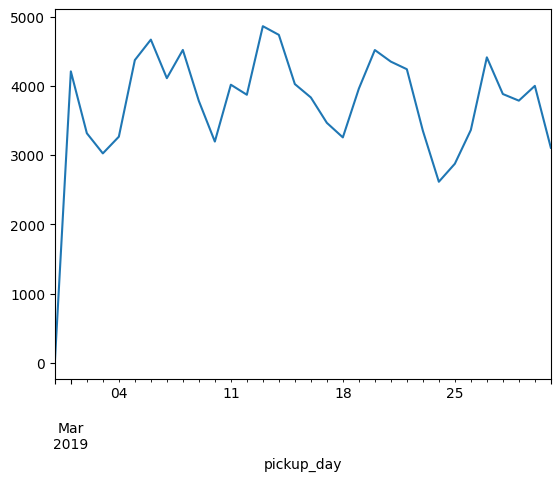

6.Виведіть кількість рядків для кожного pickup_day.

In [22]:
df_taxi_clean['pickup_day'].value_counts()

pickup_day
2019-03-14    260
2019-03-06    257
2019-03-13    244
2019-03-01    241
2019-03-08    235
2019-03-20    233
2019-03-27    232
2019-03-22    229
2019-03-05    228
2019-03-21    221
2019-03-16    220
2019-03-12    218
2019-03-07    218
2019-03-30    215
2019-03-11    209
2019-03-29    209
2019-03-23    209
2019-03-28    205
2019-03-09    204
2019-03-15    201
2019-03-19    201
2019-03-02    198
2019-03-31    187
2019-03-10    185
2019-03-17    178
2019-03-26    178
2019-03-18    173
2019-03-04    171
2019-03-03    169
2019-03-25    155
2019-03-24    149
2019-02-28      1
Name: count, dtype: int64

In [23]:
one_day_index = df_taxi_clean.idxmin()['pickup']
one_day_index

6203

Маєте побачити, що для дати 2019-02-28 є тільки один рядок. Це запис, який, схоже, потрапив сюди випадково, видаліть з набору даних df_taxi_clean рядок, що містить pickup_day рівний 2019-02-28. Та знову виведіть графік сумарних платежів по pickup_day.

In [24]:
df_taxi_clean = df_taxi_clean.drop(one_day_index)

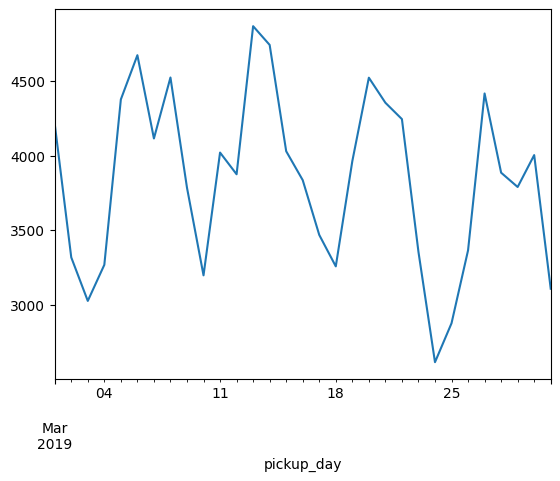

In [25]:
df_taxi_clean.groupby('pickup_day')['total'].agg('sum').plot();

Очікуваний графік:

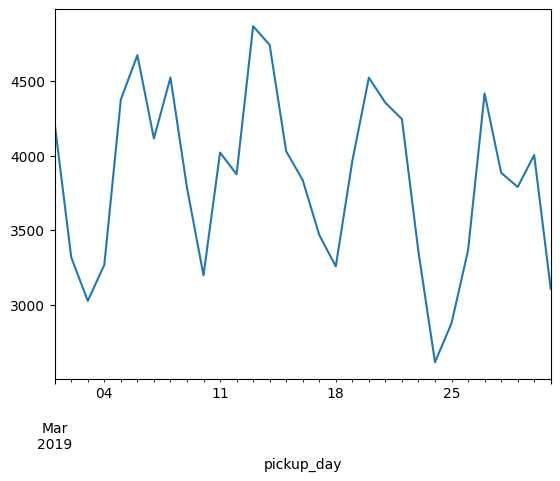

7.Давайте подивимось на динаміку сумарних платежів по районам. Для цього сформуйте на основі `df_taxi_clean` зводну таблицю, де рядками є `pickup_day`, колонками `pickup_borough`, а значенням - сума платежів. Запишіть зводну таблицю в змінну `borough_pivot`. Наостанок, вилучіть колонку зі значенням `pickup_borough` рівним `NA` - уявімо, що ці дані нас не цікавлять.

In [26]:
borough_pivot = df_taxi_clean.pivot_table(index='pickup_day', columns='pickup_borough', values='total', aggfunc='sum').drop('NA', axis=1)
borough_pivot.head(10)

pickup_borough,Bronx,Brooklyn,Manhattan,Queens
pickup_day,,,,
2019-03-01,123.42,353.05,3169.47,553.29
2019-03-02,NaN,146.56,2716.33,456.13
2019-03-03,80.75,407.06,2100.23,428.73
2019-03-04,92.00,188.73,2026.17,962.18
2019-03-05,98.16,558.40,2981.26,739.56
2019-03-06,130.65,198.53,3501.07,833.36
2019-03-07,NaN,440.75,3087.82,587.13
2019-03-08,79.20,237.47,3408.85,780.34
2019-03-09,80.22,187.88,2967.71,511.73


Далі запустіть наступну клітинку та дайте відповідь на питання, в якому районі найчастіше найбільша сума денних платежів за поїздки на таксі?   
До речі, також рекомендую спробувати запустити команду `borough_pivot.plot()` та зрозуміти, навіщо нам тут частина `fillna(0)`.

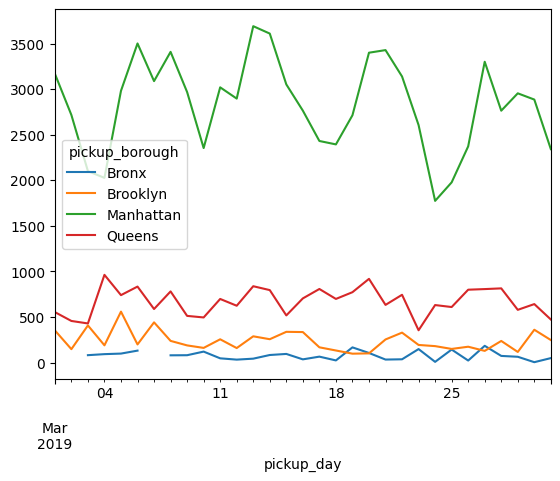

In [27]:
borough_pivot.plot();

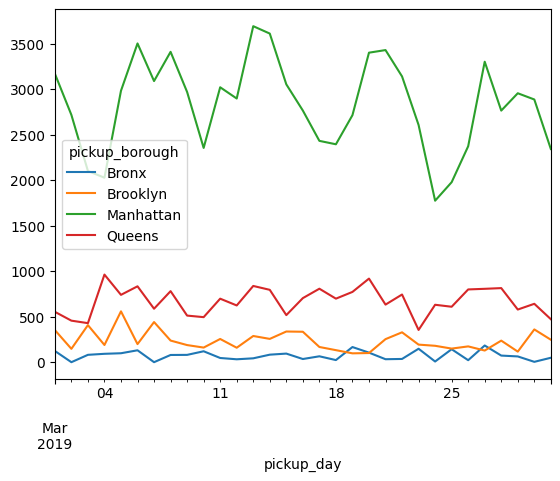

In [28]:
borough_pivot.fillna(0).plot();

Найчастіше найбільша сума за поїздки в районі Manhattan. 
fillna(0) ми використали для того, щоб не було пропусків на графіку, так як plot не враховує данні типу NaN. 

Очікуваний графік :

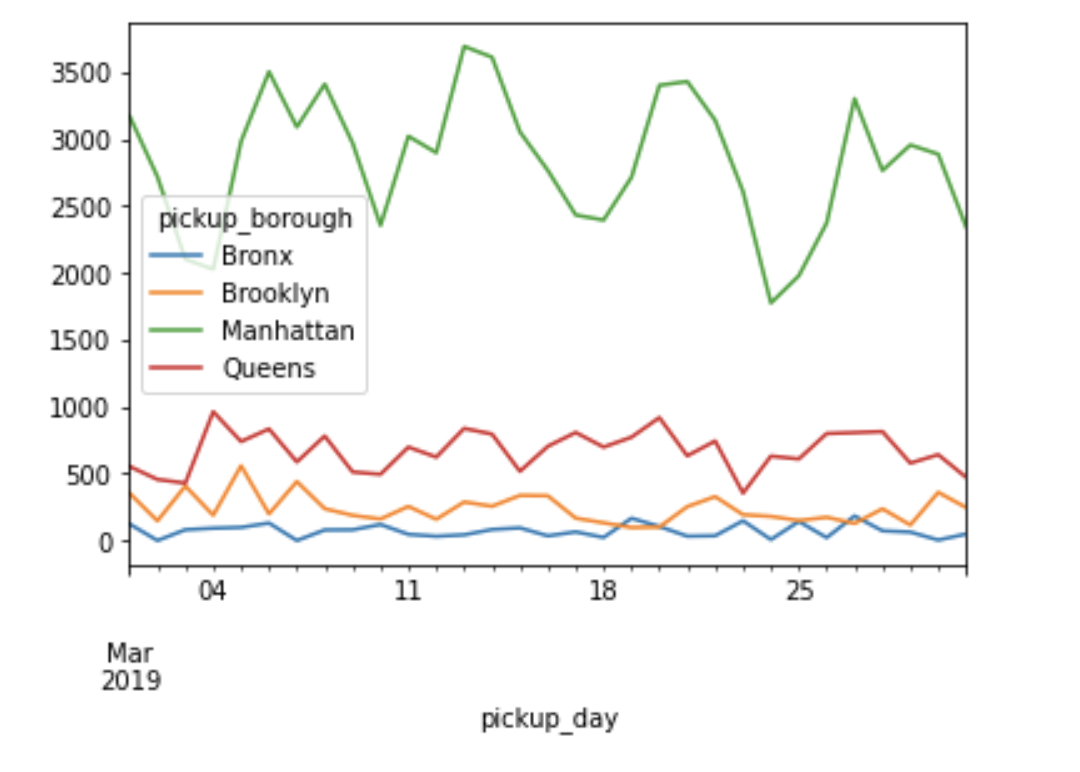

8.Виведіть будь-яким способом гістограми суми денних платежів за поїздки по кожному з районів. Має бути 4 гістограми, на 4ох різних фігурах, або на одній.   

`Підказка:` Найпростіше це буде зробити, використавши `borough_pivot` та побудову графіку через `<назва датафрейму>.<назва графіку>()` - тобто методом датафрейму з пандаса. Але графік можна побудувати також використовуючи цикл. Для тих, хто хоче потренуватись, рекомендую зробити обома способами.

Пограйтесь з кількістю бінів. Яка кількість бінів на ваш погляд тут є вдалою? Чому?

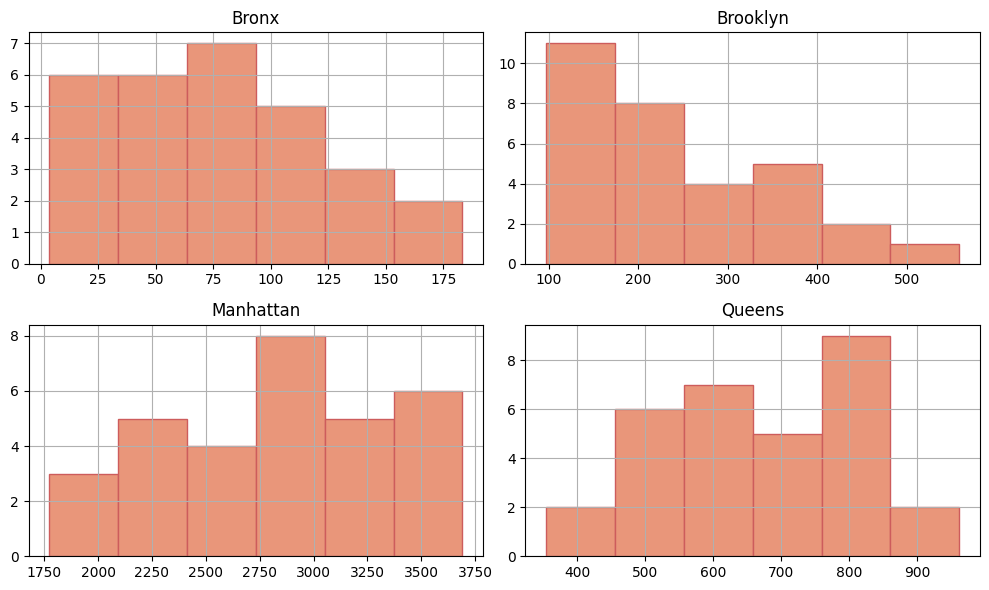

In [29]:
borough_pivot.hist(figsize=(10, 6), bins=6, color='darksalmon', edgecolor='indianred')
plt.tight_layout();

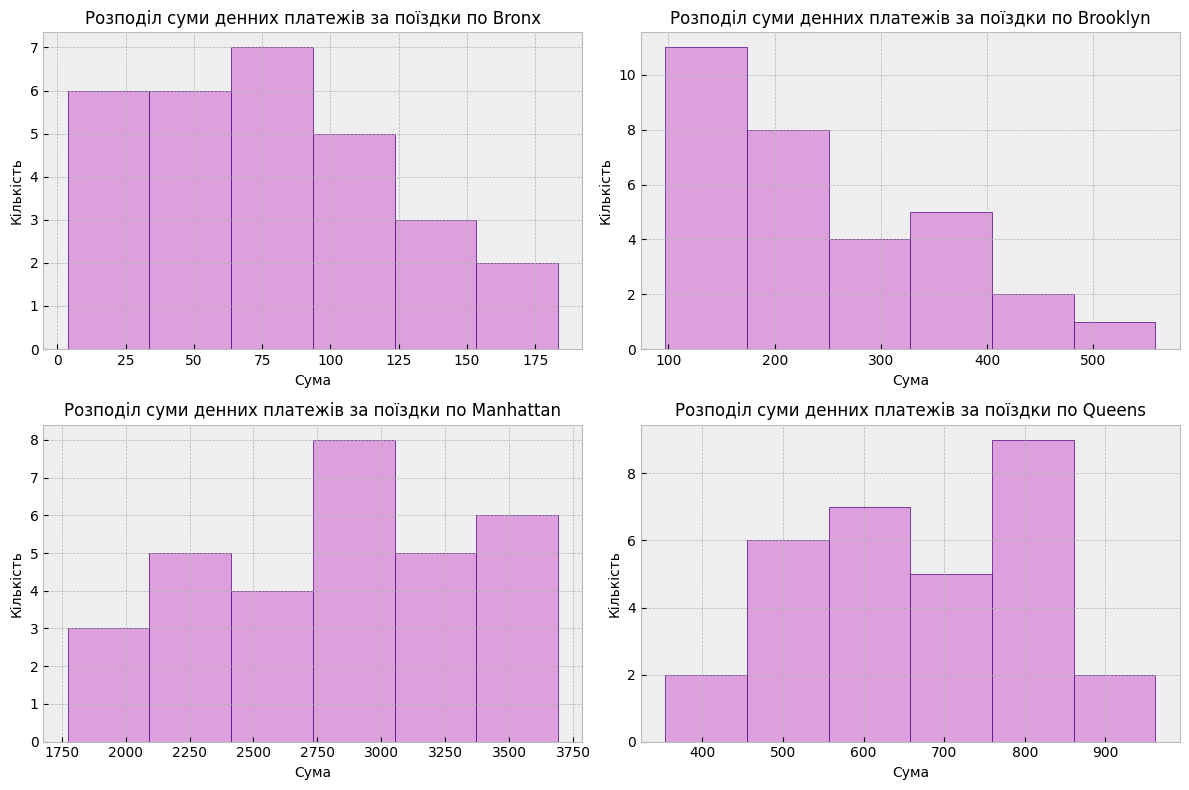

In [30]:
nrows = 2
ncols = 2
with plt.style.context('bmh'):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
    for i, column in enumerate(borough_pivot.columns):
        row = i // ncols
        col = i % ncols
        axes[row, col].hist(borough_pivot[column], bins=6, color='plum', edgecolor='indigo')
        axes[row, col].set_title(f'Розподіл суми денних платежів за поїздки по {column}', fontsize=12)
        axes[row, col].set_xlabel('Сума', fontsize=10)
        axes[row, col].set_ylabel('Кількість', fontsize=10)
    plt.tight_layout();

Приклад одного з правильних виконань завдання:

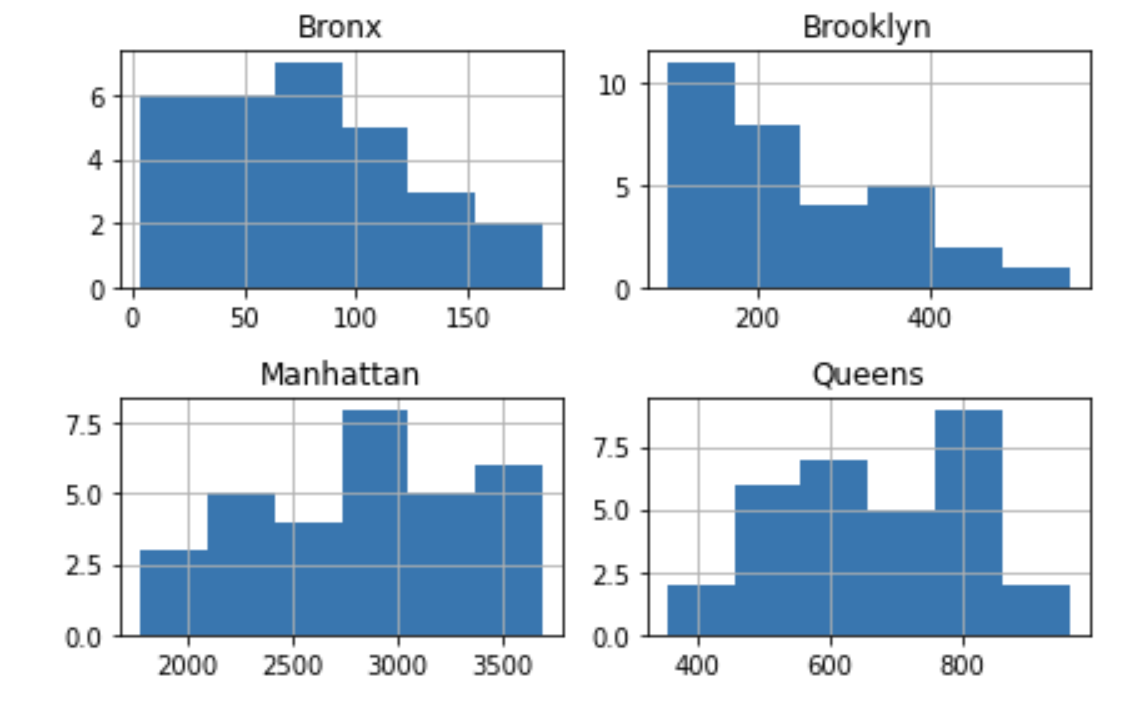

9.Бачимо, що на окремих гістограмах у нас різні діапазони чеків. Припустимо, нам хочеться порівняти розподіли денних сум платежів по райнам. Давайте для цього виведемо 4 гістограми на одній фігурі. Вони звісно ж мають бути різного кольору і напівпрозорими для комфортного перегляду. Створіть гістограму максимально близьку до тої, що надана в очікуваному результаті.
`Підказка:` ця візуалізація створена з допомогою pandas plotting.

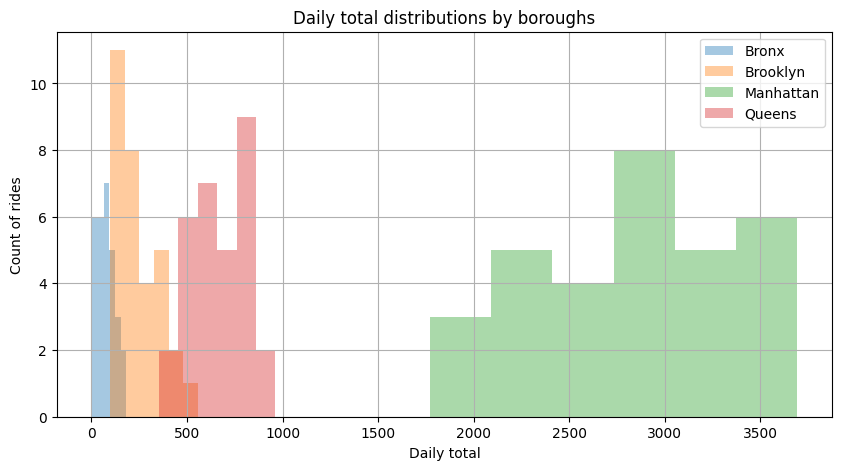

In [31]:
plt.figure(figsize=(10, 5))
for column in borough_pivot.columns:
    borough_pivot[column].hist(bins=6, alpha=0.4, legend=True)
    plt.title(f'Daily total distributions by boroughs')
    plt.xlabel('Daily total')
    plt.ylabel('Count of rides');

Очікуваний результат:

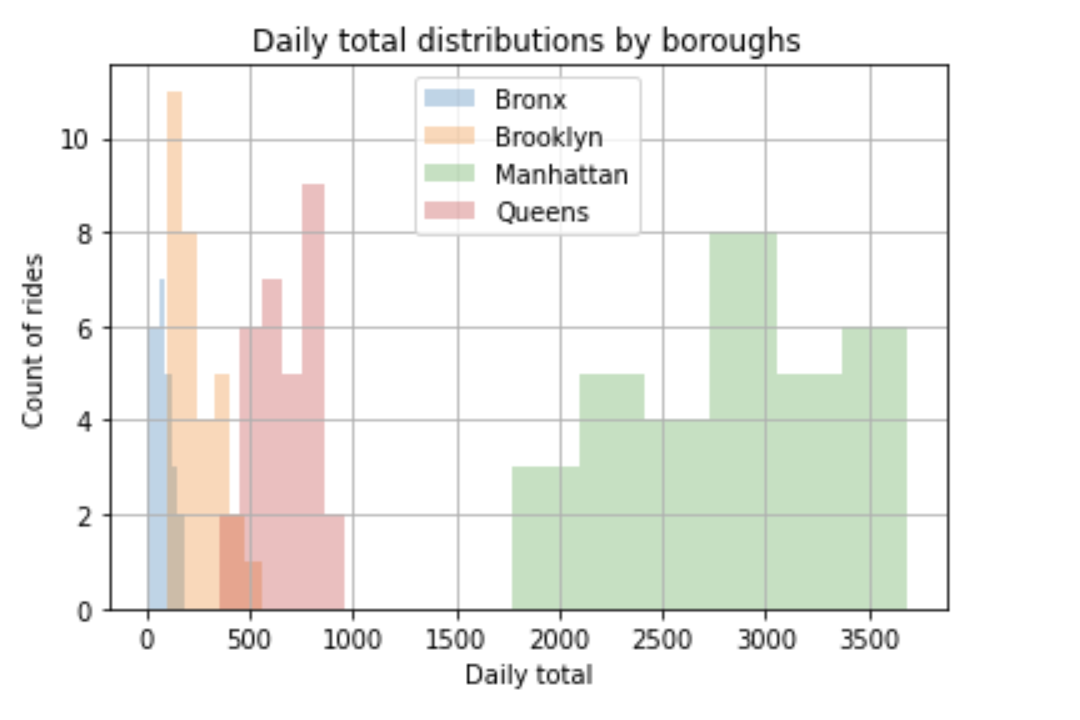

А ось приклад, як можна було сформувати щось подібне з допомогою функціоналу seaborn. Як на мене візуалізація за замовчанням не є зручною для розуміння.  

`Опціональне завдання`: Пограйтесь з налаштуваннями і пошукайте варіант, за якого візуалізація розподілу суми денних платежів через seaborn є на ваш погляд зручною для аналізу.

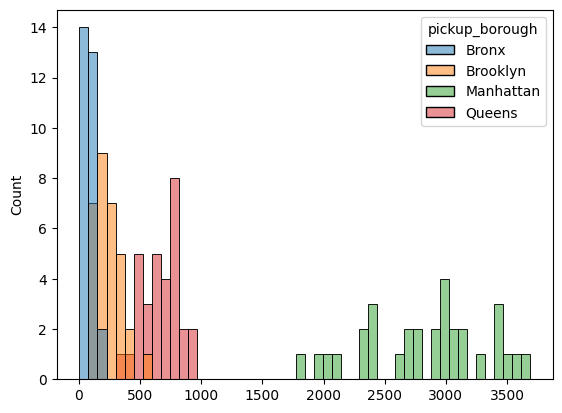

In [32]:
sns.histplot(data=borough_pivot, bins=50);

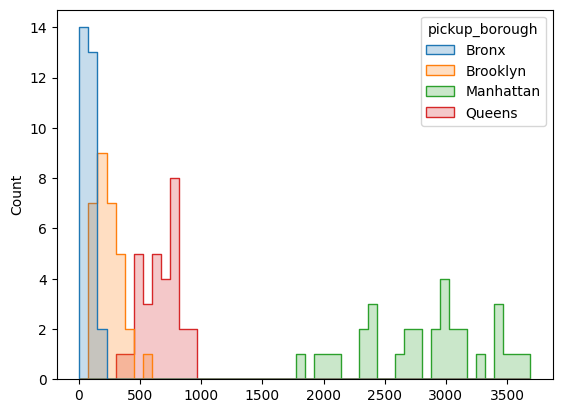

In [33]:
sns.histplot(data=borough_pivot, bins=50, element="step");

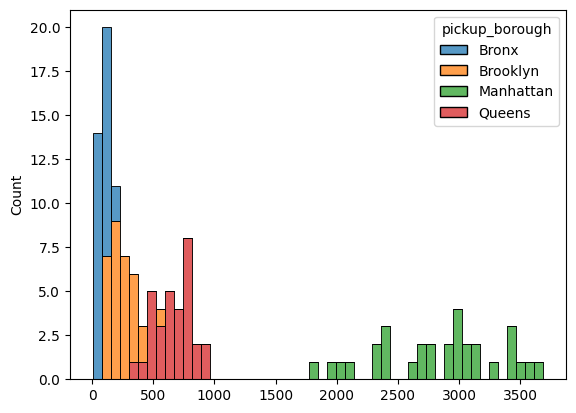

In [34]:
sns.histplot(data=borough_pivot, bins=50, multiple="stack");

На мій погляд, варіант з element="step" в налаштуваннях дає найкращий вид для розуміння та читання гістограми, оскільки чітко видно кордони кожної окремої гістограми.

10.З допомогою seaborn виведіть гістограми суми щомісячних платежів по кольорам автомобілів (колонка `color`). На одній фігурі має бути кількість гістограм рівна кількості різних кольорів автомобілів в наборі даних. Встановіть розмір фігури (10,5) та знайдіть значення dots-per-inch для фігури за якого якість зображення буде хорошою (зображення не буде розмитим).
`Підказки:` 
1. побудувати візуалізацію можна в один рядок коду, і ще один рядок - для встановлення розмірів і роздільної здатності фігури. 
2. для зміни порядку відображення гістограм кольорів автомобілів (аби менша гістограма була перед, а не за більшою) можна посортувати датафрейм за полем кольору так, аби отримати той порядок, який вам потрібен. 

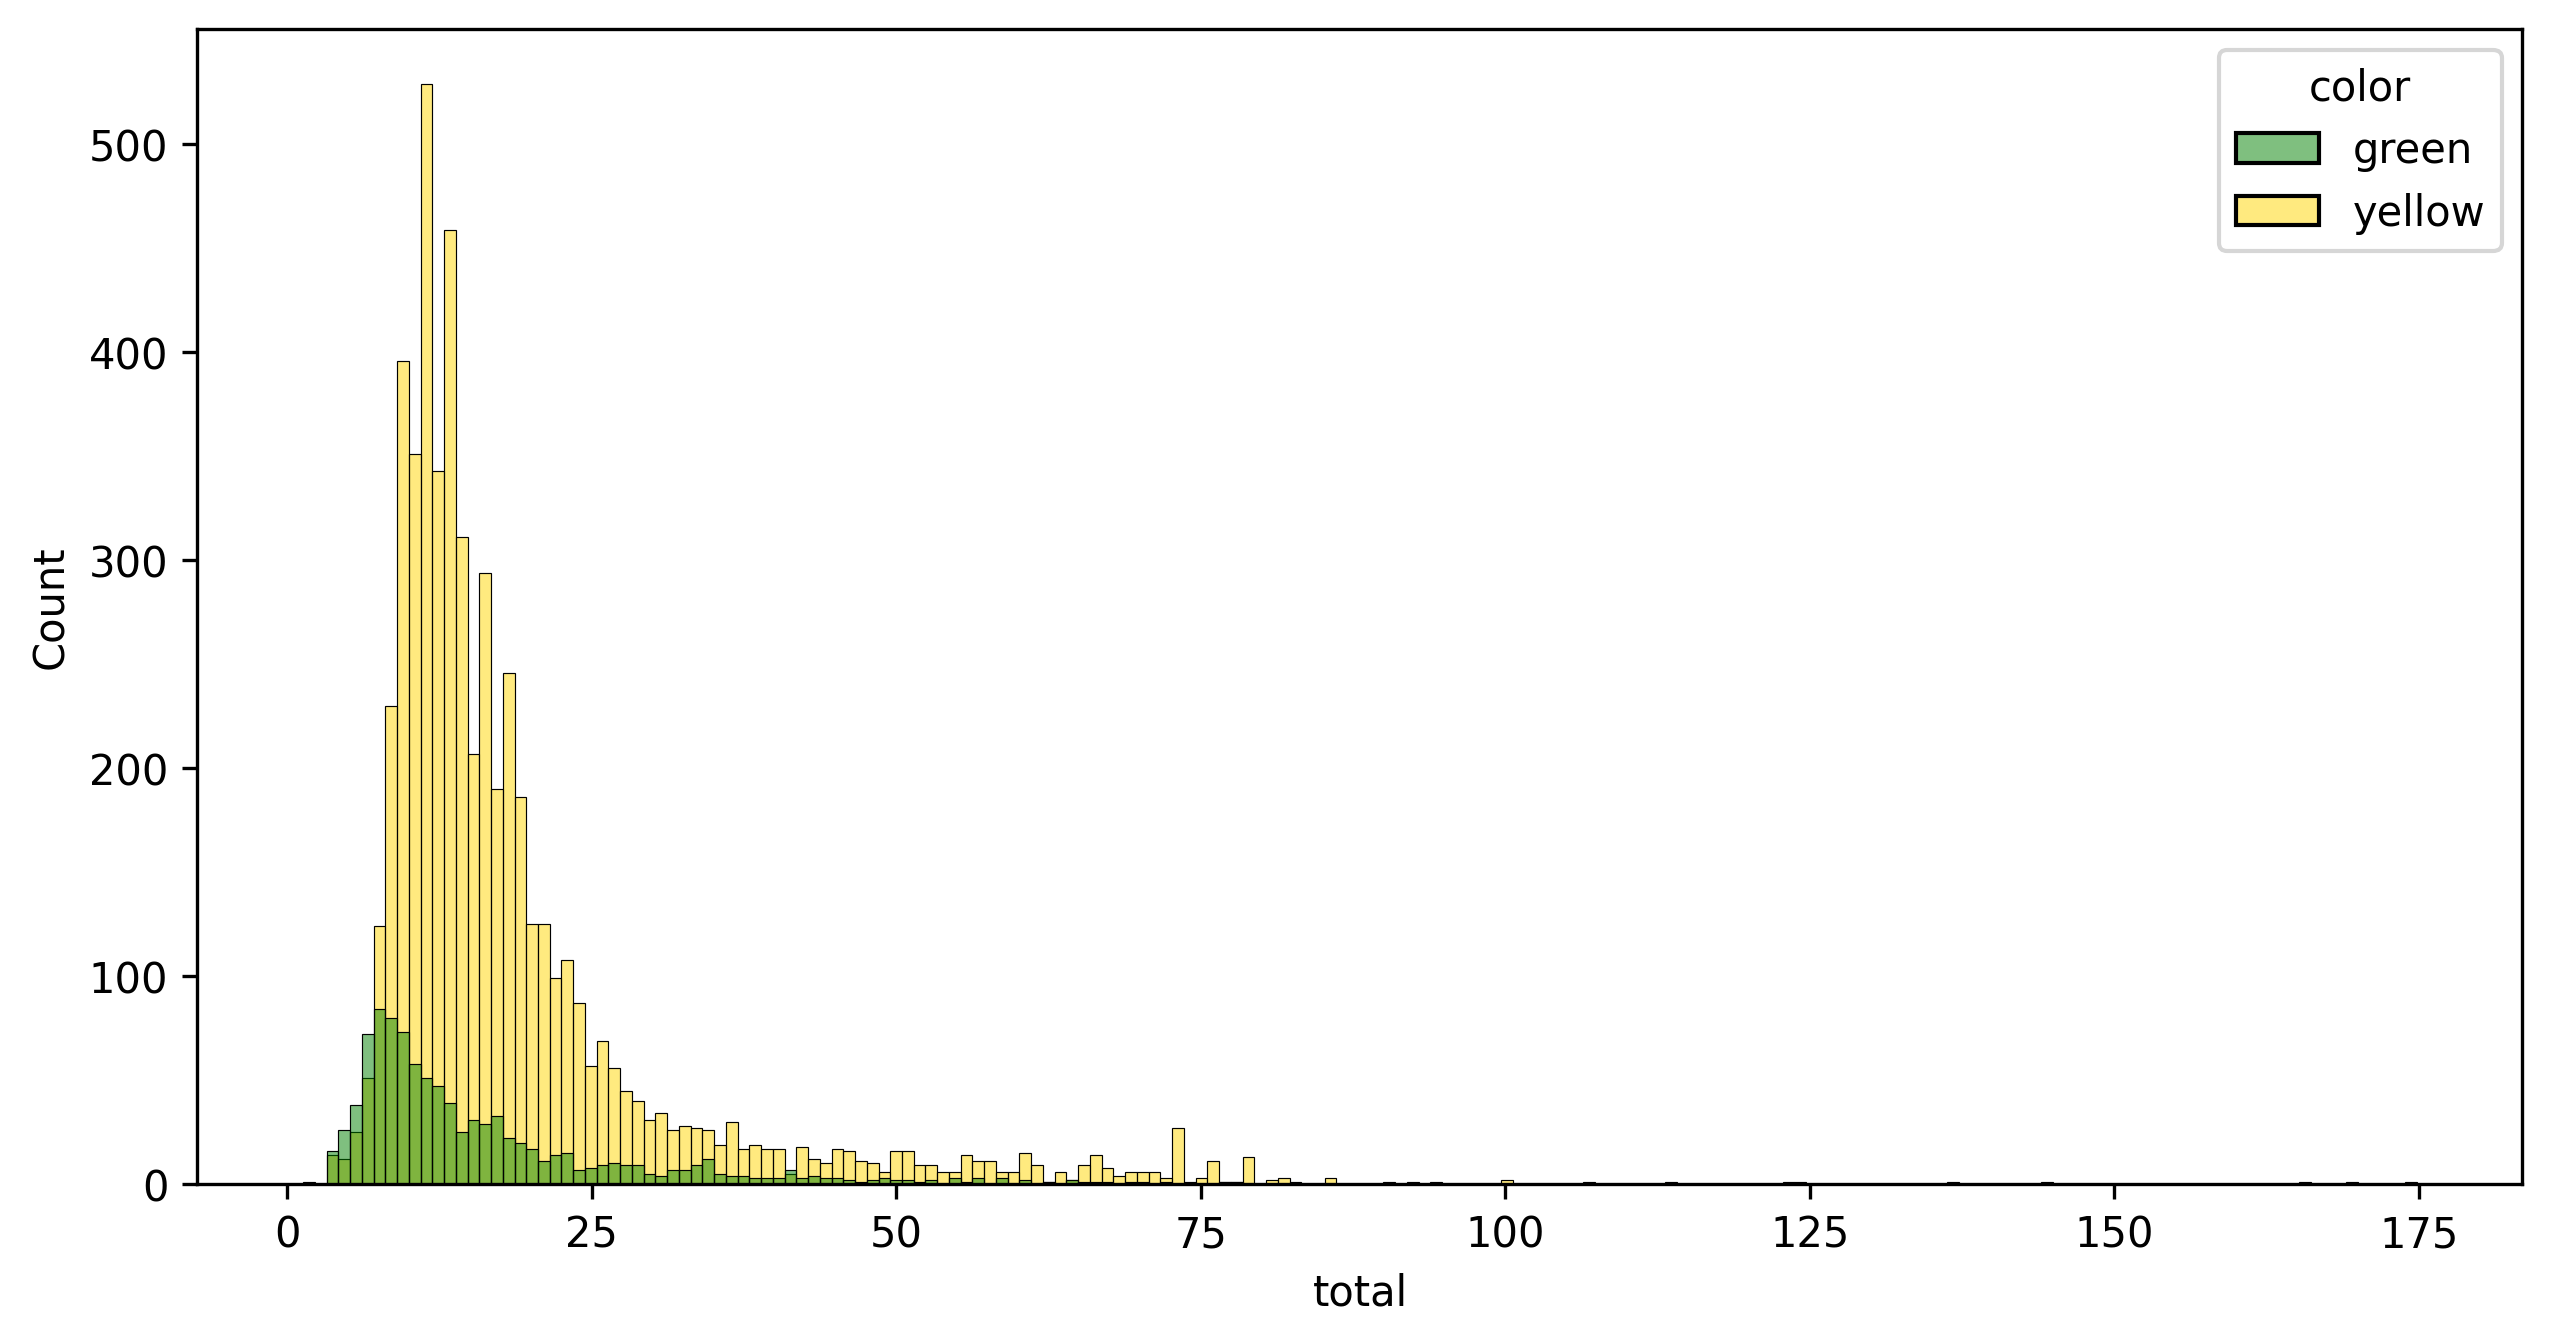

In [35]:
plt.figure(figsize=(10,5), dpi=300)
color_palette = {'yellow': 'gold', 'green': 'green'}
sns.histplot(x='total', data=df_taxi_clean.sort_values(by='color'), hue='color', bins=180, palette=color_palette);

Як бачимо з графіку, загальна кількість поїздок жовтих таксі значно переважає кількість поїздок зеленими авто. При цьому, саме зелені авто переважають в поїздках, які мають невелику вартість (до 7 долларів приблизно). 

Очікуваний результат:

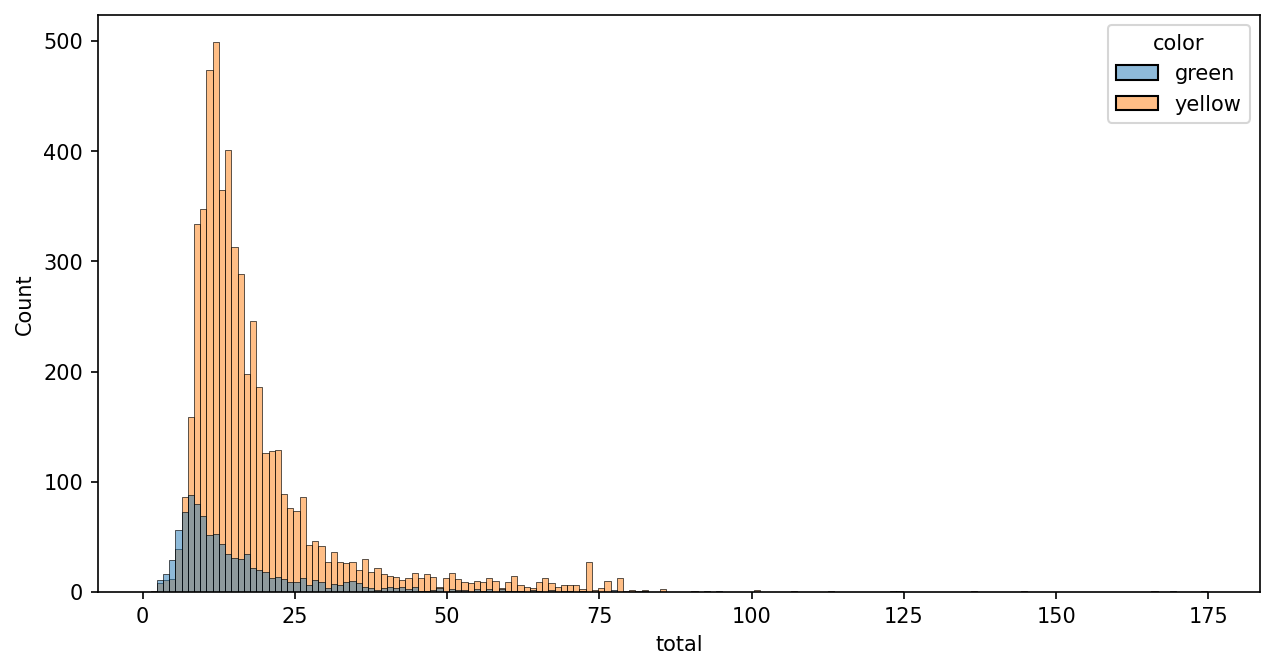

11.Цікаво, а чи є залежність між дальністю поїздки і розміром чайових? Побудуйте діаграму розсіювання між дальністю поїздки і розміром чайових. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

В очікуваному результаті я надаю графік, який би будувала я. На наведеному прикладі найскладніша частина - це зробити червоною цю лінію тренду (вона побудована з допомогою спеціального типу графіку в seaborn). Аби вказати колір лінії в тому типу графіку треба зазначити в параметрі `line_kws`, що ми хочемо лінію червоного кольору. Але якщо у вас не буде виходити лінія червоного кольору - нехай буде синього - це не критично :) 

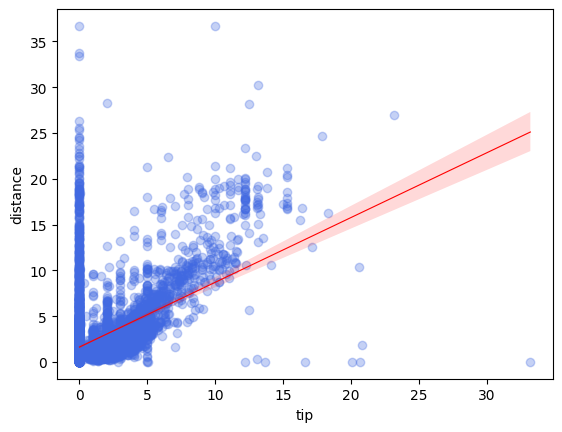

In [36]:
x=df_taxi_clean['tip']
y=df_taxi_clean['distance']
sns.regplot(x=x, y=y, scatter_kws=dict(color='royalblue', alpha=.3), line_kws=dict(color="r", linewidth=0.8));


Один з можливих результатів (побудовано з seaborn):

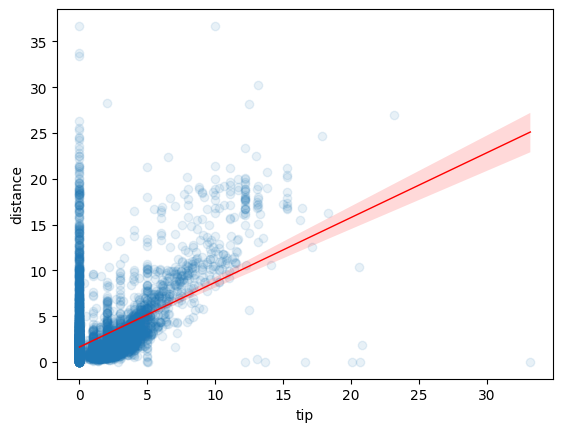

12.Дайте відповідь на питання: що означає пряма лінія з точок, паралельна осі, за якою розташована дальність поїздки?

З графіку можемо зробити висновок, що в цілому маємо зростаючу лінію тренду, яка вказує на позитивний зв'язок між дальністю дистанції та розміром чайових. Тобто, чим далі їдемо, тим більше даємо на чай.
Пряма лінія, це ті поїздки, по яких розмір чайових дорівнює 0.

13.Побудуйте поденну динаміку чайових по районам, в яких забрали пасажира. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. Важливо, щоб на одному графіку було 4 лінії (всі райони, крім `NA`), які відображають динаміку чайових, була легенда і були підписи вісей. В очікуваному результаті я надаю графік, який би будувала я. 

Дайте відповіді на питання:
- при початку поїздки в якому районі **найнижчий середній розмір** чайових?
- а в поїздках з якого району **найвищий середній розмір** чайових? 
- при проїздках з його району розмір чайових найстабільніший (найменше змінюється з дня у день)?

In [37]:
filtered_borough = df_taxi_clean[df_taxi_clean['pickup_borough']!='NA']

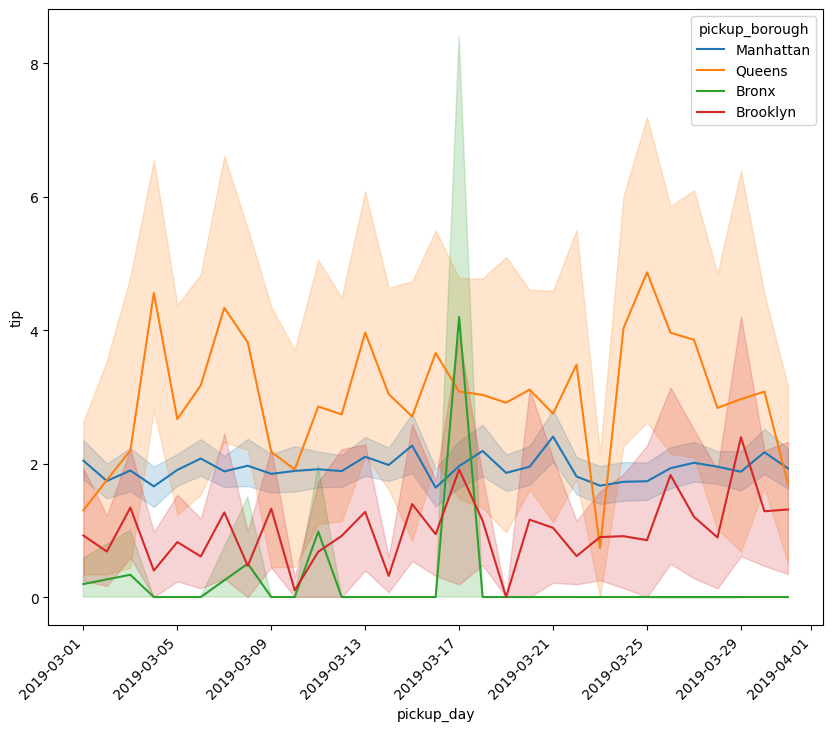

In [38]:
plt.figure(figsize=(10, 8))
sns.lineplot(x='pickup_day', y='tip', data=filtered_borough, dashes=False, hue='pickup_borough')
plt.xticks(rotation=45, ha='right');

- найнижчий середній розмір чайових у районі Bronx
- найвищий середній розмір чайових у районі Queens
- найстабільніший розмір чайових у районі Manhattan 

Один з можливих результатів (побудовано з seaborn):

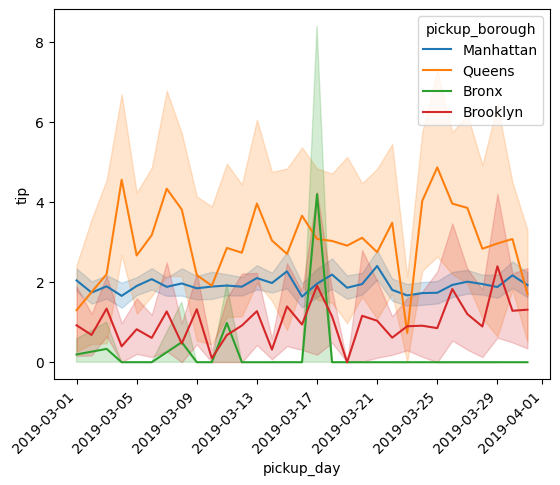

14.Побудуйте box-plot розміру чайових по району (всі райони, крім `NA`) старту поїздки. Можна побудувати графік будь-яким методом, який вам до вподоби, чи хочеться потренувати. 

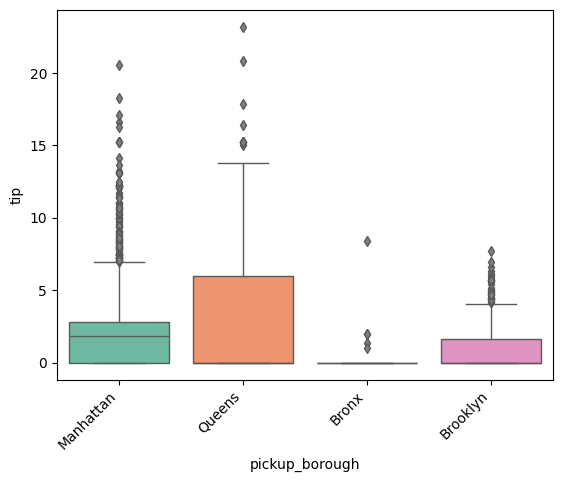

In [39]:
with sns.color_palette("Set2"):
    sns.boxplot(x='pickup_borough', y='tip', data=filtered_borough, hue='pickup_borough',
                saturation=0.8,
                flierprops={"marker": 'd', 'markerfacecolor': 'gray', 'markersize': 5})
    plt.xticks(rotation=45, ha='right');

In [40]:
filtered_borough.groupby('pickup_borough')['tip'].agg(['count', 'median', 'mean'])

,count,median,mean
pickup_borough,,,
Bronx,99,0.00,0.148586
Brooklyn,383,0.00,0.966345
Manhattan,5268,1.86,1.939550
Queens,656,0.00,3.044695


In [41]:
filtered_borough[filtered_borough['pickup_borough'] == 'Queens']['tip'].value_counts().sort_index().head(5)

tip
0.00    355
0.01      2
0.02      1
0.06      1
0.25      1
Name: count, dtype: int64

In [42]:
filtered_borough[filtered_borough['pickup_borough'] == 'Queens']['tip'].describe()

count    656.000000
mean       3.044695
std        4.354034
min        0.000000
25%        0.000000
50%        0.000000
75%        5.962500
max       23.190000
Name: tip, dtype: float64

In [43]:
IQR = 5.9625 - 0.0
5.9625 + 1.5 * IQR

14.906250000000002

Один з можливих результатів (побудовано з seaborn):

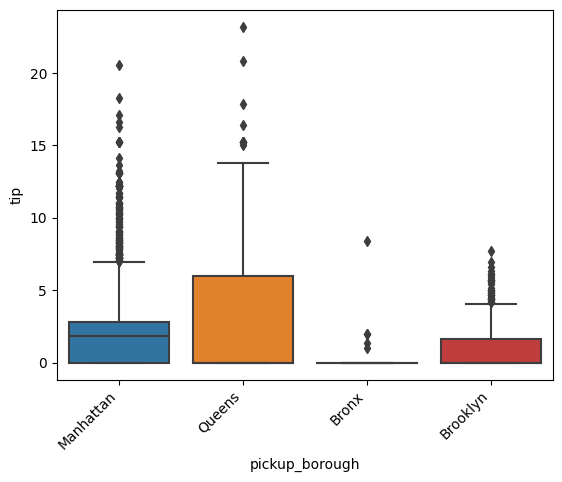

15.Творче завдання. Створіть ТРИ інформативних візуалізації, які б допомогли в аналізі цих даних.   

Що вам було б цікаво дізнатись про ці поїздки? Як це можна було б використати при прийнятті рішень бізнесом? 
Наприклад, якщо найбільше поїздок в певний час доби, значить, треба стимулювати водіїв працювати в ці години. Якщо найбільше поїздок з певного району - треба тримати там запас авто, які б могли взяти пасажирів і т.д.
Не обмежуйте свою фантазію. 

Візуалізації мають бути не тими, на які ми вже побудували вище. Але можна створювати аналогічні, просто з використанням інших полів даних. І описати, що ви бачите з тих візуалізацій.
Кожна візуалізація оцінюється як 1 завдання. Без виконання цього завдання ДЗ не приймається. Якщо є питання щодо виконання - пишіть у чат.

## Які типи оплати найбільш популярні. Які оплати супроводжуються найвищими/найнижчими чайовими?

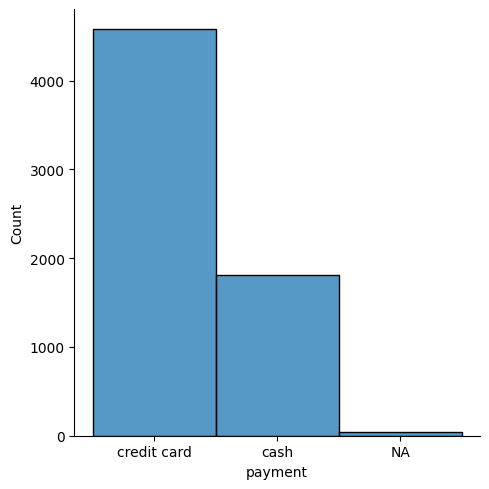

In [44]:
sns.displot(x='payment', data=df_taxi_clean);

Як бачимо, NA мають незначущу кількість значень, тому вподальшому аналізі та візуалізації ми не використовуватимемо ці дані.

In [45]:
t = df_taxi_clean[df_taxi_clean['payment'] != 'NA']['payment'].value_counts(normalize=True).reset_index()
prop =(t['proportion'] * 100).to_list()
labels = t['payment'].to_list()

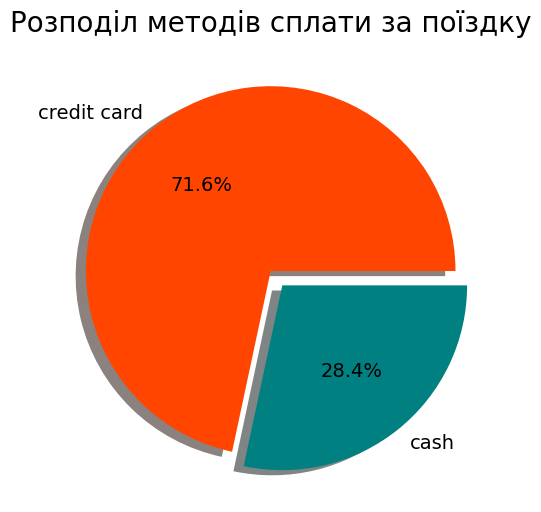

In [46]:
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10, 6))
ax.pie(prop, explode=explode, labels=labels, autopct='%1.1f%%', 
       shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9}, 
       colors=['orangered', 'teal'],
       textprops={'fontsize': 14});
ax.set_title('Розподіл методів сплати за поїздку', fontsize=20);

In [47]:
df_taxi_clean[df_taxi_clean['payment'] != 'NA'].groupby('payment')['tip'].agg(['min', 'max', 'mean'])

,min,max,mean
payment,,,
cash,0.0,0.0,0.000000
credit card,0.0,33.2,2.781805


In [48]:
df_taxi_clean[df_taxi_clean['payment'] == 'cash']['tip'].unique()

array([0.])

Те, що чайові є тільки в тих даних, де оплата була кредитною карткою, може означати, що водії ніяк не відображають (бо це не передбачено), що отримали чайові, або спеціально не відображають, щоб не показувати свій додатковий дохід. Нажаль, ми не маємо достатньо інформації, щодо подальшої долі чайових: чи 100% цієї суми іде водію, чи сума чайових ділиться між компанією та водієм, тому аналіз на рівні гепотиз.

## Подивимось на розподіл кількості поїздок по годинам доби

In [49]:
df_taxi_clean['pickup_time'] = df_taxi_clean['pickup'].dt.hour

In [50]:
def part(hour):
    if hour >= 0 and hour <= 5:
        return 'Ніч'
    if hour >= 6 and hour <= 11:
        return 'Ранок'
    if hour >= 12 and hour <= 17:
        return 'День'
    if hour >= 18 and hour <= 23:
        return 'Вечір'

In [51]:
df_taxi_clean['part_of_day'] = df_taxi_clean['pickup_time'].apply(part)

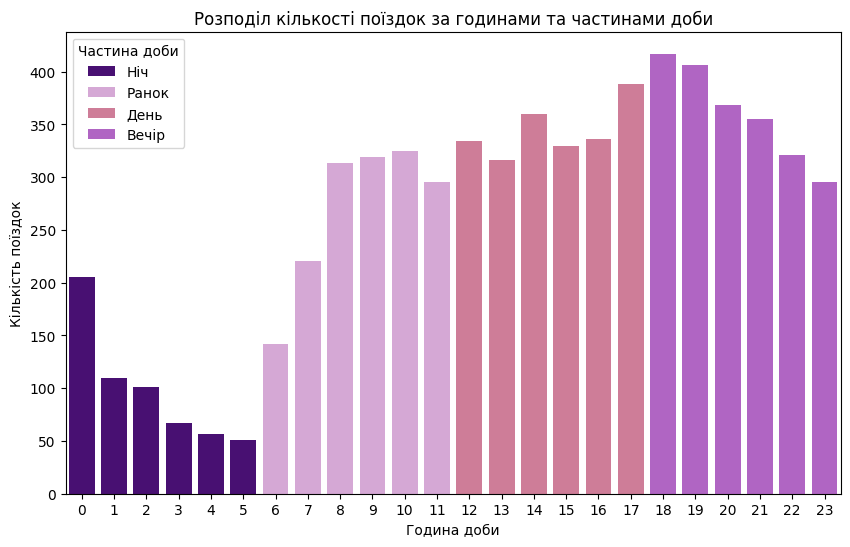

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='pickup_time', hue='part_of_day', data=df_taxi_clean, 
              palette={'Ніч': 'indigo', 'Ранок': 'plum', 'День': 'palevioletred', 'Вечір': 'mediumorchid'})
plt.title('Розподіл кількості поїздок за годинами та частинами доби')
plt.xlabel('Година доби')
plt.ylabel('Кількість поїздок')
plt.legend(title='Частина доби');

Як бачимо, впродовж дня кількість випадків використання таксі зростає і досягає піку з 17 по 19 години. Має сенс звернути на цей часовий проміжок для потенційного збільшення кількості автомобілей.

## Подивимось також на залежність між частиною доби та розміром чайових окремо для кожного кольору авто

In [53]:
sns.set_theme(style="whitegrid")

Ввечорі спостерігається стабільний розподіл значень навколо середнього

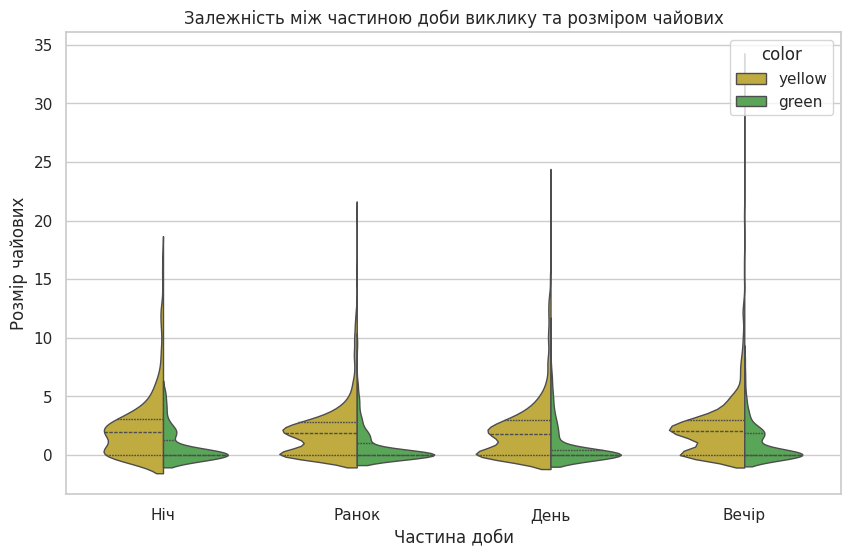

In [54]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_taxi_clean['part_of_day'], y=df_taxi_clean['tip'], 
                hue=df_taxi_clean['color'], palette= ['gold', 'limegreen'], 
                saturation=0.50, order=['Ніч', 'Ранок', 'День', 'Вечір'],
                split=True, linewidth=1, inner="quart")
plt.xlabel('Частина доби')
plt.ylabel('Розмір чайових')
plt.title('Залежність між частиною доби виклику та розміром чайових');

In [55]:
df_taxi_clean.groupby(['part_of_day', 'color'])['tip'].describe()

count      mean       std  min  25%   50%     75%    max
part_of_day color                                                            
Вечір       green    294.0  0.984864  1.539398  0.0  0.0  0.00  1.8425   8.39
            yellow  1868.0  2.289074  2.453323  0.0  0.0  2.00  3.0000  33.20
День        green    328.0  0.757287  1.619740  0.0  0.0  0.00  0.4125  10.71
            yellow  1736.0  2.184983  2.708274  0.0  0.0  1.76  2.9600  23.19
Ніч         green     86.0  0.692907  1.306219  0.0  0.0  0.00  1.2600   5.26
            yellow   505.0  2.330495  2.736545  0.0  0.0  1.95  3.0600  17.10
Ранок       green    273.0  0.672564  1.351488  0.0  0.0  0.00  1.0000   9.51
            yellow  1342.0  2.015768  2.271921  0.0  0.0  1.85  2.7600  20.56

Загалом бачимо, що основна маса спостережень зосереджена на однаковому рівні, незалежно від частини доби. Але спостерігається значуща різниця між кількістю випадків отримання чайових саме жовтими машинами.
Можна висунути декілька гепотиз, чому так відбувається:
1. Жовті машини є своєрідною візитівкою Нью Йорку, їх легше помітити плюс вони точно впізнаваніші за зелені серед туристів. Отже, можуть саме через це користуватися більшою довірою клієнтів.
2. Відповідно до відкритих даних, зелені таксі були засновані у 2013 році як альтернатива жовтому таксі. Послуги зеленого таксі нижчі за жовті, вони здебільшого обслуговують віддалені райони міста, куди жовті таксі не приїжджають. Отже, можна зробити висновок, що клієнтами зеленого таксі є менш сплатоспроможні люди, а через це і розмір чайових може бути значно меншим. А якщо чайові і даються, їх розмір має бути пропорційним загальній вартості поїздки, яка з самого початку дешевша.
3. Крім того, з відкритих даних відомо, що зеленим таксі заборонено брати пасажирів в аеропортах та в районі деяких вулиць Манхеттена. Тобто вони завідомо не мають доступу до клієнтів, які можуть бути схильними залишити гарні чайові. 
4. Ввечорі кількість та розмір чайових зеленого таксі дещо збільшується, це можна пояснити нестачею жовтих машин через великий попит. 